In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [189]:
raw_data= pd.read_csv("loan_data.csv")

In [190]:
raw_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [191]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [192]:
raw_data.drop(columns=["Loan_ID"], inplace = True)
raw_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [193]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [194]:
for i in raw_data.columns:
    if raw_data[i].dtype == object:
        raw_data[i].fillna(raw_data[i].mode()[0],inplace=True)
    else:
        raw_data[i].fillna(raw_data[i].mean(),inplace=True)
    

In [195]:
raw_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [196]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
for i in raw_data.columns:
    if raw_data[i].dtype == object:
        raw_data[i]=LB.fit_transform(raw_data[i])

In [131]:
raw_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [201]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()
scale_data=sts.fit_transform(raw_data.drop(columns=["Loan_Status"]))
scale_data.shape

(614, 11)

In [134]:
scaler_data=pd.DataFrame(data=scale_data,columns=raw_data.columns.drop("Loan_Status"))
scaler_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.279851,0.451640,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.279851,0.451640,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.279851,0.451640,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.279851,0.451640,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.279851,0.451640,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-0.898095,0.279851,0.451640,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279,-2.518655,0.451640,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371,0.279851,0.451640,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,0.483367,0.279851,0.451640,1.223298


In [211]:
x=scaler_data
y=raw_data["Loan_Status"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=raw_data["Loan_Status"],random_state=10,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(491, 11) (123, 11) (491,) (123,)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
164,0.472343,0.728816,-0.737806,-0.528362,-0.392601,0.642120,-0.554487,-0.850459,-2.518655,4.516405e-01,1.223298
171,0.472343,0.728816,2.236021,-0.528362,-0.392601,7.594864,-0.554487,6.592764,-0.652985,4.516405e-01,1.223298
546,0.472343,-1.372089,-0.737806,1.892641,-0.392601,-0.335098,-0.554487,-0.790913,-4.757459,4.516405e-01,-0.047607
226,0.472343,0.728816,-0.737806,1.892641,2.547117,-0.109511,-0.554487,-0.100182,0.279851,4.516405e-01,1.223298
176,0.472343,0.728816,1.244745,-0.528362,-0.392601,-0.550200,-0.000768,-0.540821,0.279851,4.516405e-01,-1.318513
...,...,...,...,...,...,...,...,...,...,...,...
560,0.472343,0.728816,1.244745,1.892641,-0.392601,-0.283165,-0.471720,-0.457456,0.279851,4.516405e-01,-0.047607
503,0.472343,0.728816,0.253470,1.892641,-0.392601,-0.221731,1.258866,-0.100182,0.279851,3.177548e-16,-1.318513
343,0.472343,0.728816,2.236021,1.892641,-0.392601,-0.365406,-0.554487,-0.862368,0.279851,4.516405e-01,-0.047607
148,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,0.753029,0.015307,0.935915,0.279851,4.516405e-01,-1.318513


In [205]:
import keras
from keras.models import Sequential
from keras.layers import InputLayer, Dense
import tensorflow as tf

In [206]:
input_neurons=x_train.shape[1]
output_neurons=1
no_of_hidden_layer=2
neurons_in_hidden_layer_1=10
neurons_in_hidden_layer_2=5

In [207]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neurons_in_hidden_layer_1,activation="relu"))
model.add(Dense(units=neurons_in_hidden_layer_2,activation="relu"))
model.add(Dense(units=output_neurons,activation="sigmoid"))

In [218]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [209]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics="accuracy")

In [220]:
print(x_train.shape)
model_history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)


(491, 11)
Epoch 1/50
16/16 [==============================] - 0s 10ms/step - loss: 0.3823 - accuracy: 0.8289 - val_loss: 0.5670 - val_accuracy: 0.7805
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.3814 - accuracy: 0.8289 - val_loss: 0.5693 - val_accuracy: 0.7805
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.3810 - accuracy: 0.8310 - val_loss: 0.5697 - val_accuracy: 0.7805
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.3808 - accuracy: 0.8310 - val_loss: 0.5703 - val_accuracy: 0.7805
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.3807 - accuracy: 0.8289 - val_loss: 0.5711 - val_accuracy: 0.7805
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 0.3802 - accuracy: 0.8269 - val_loss: 0.5734 - val_accuracy: 0.7805
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.3799 - accuracy: 0.8269 - val_loss: 0.5757 - val_accuracy: 0.7805
Epoch 8/5

In [221]:
prediction=model.predict_classes(x_test)
prediction

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [222]:
#from sklearn.metrics import accuracy_score
#accuracy_score(y_test,prediction)

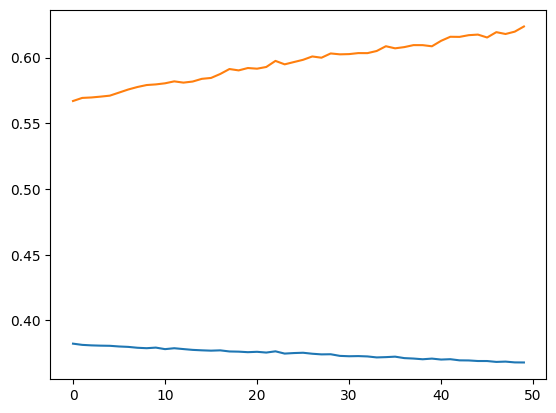

In [223]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])

In [1]:
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])

NameError: name 'plt' is not defined

In [8]:
import tensorflow as tf
import torch 

In [9]:
torch.ones(2,2,require_grad=True)

tensor([[1., 1.],
        [1., 1.]])